In [1]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

np.random.seed(42)

from keras.models import Sequential
from keras.layers import Dense,LSTM, Masking, Dropout
from keras.preprocessing import sequence
import tensorflow as tf
from tensorflow import keras

tf.random.set_seed(42)

from sklearn.model_selection import train_test_split,KFold,cross_val_score
from keras.layers import Activation,Flatten


import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing

from keras.models import Sequential
from keras.layers import Dense,LSTM, Masking, Dropout
from keras.preprocessing import sequence
import tensorflow as tf
from tensorflow import keras

tf.random.set_seed(42)

from sklearn.model_selection import train_test_split,KFold,cross_val_score
from keras.layers import Activation,Flatten

import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPool1D, Dropout, Activation

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras

np.random.seed(42)

import pickle

# load data

In [9]:
df1_ori=pd.read_csv('=DWEE-wholedata_Xy.csv', low_memory = False)

In [10]:
df1_ori

,Unnamed: 0,TimePeriod,Act1,Act2,Act3,Act4,Act5,Act6,Act7,Act8,Act9,Act10,Act11,Act12,id1,final_result
0,0,T0,12.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[0.0],[0.0]
1,1,T1,9.0,0.0,5.0,7.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,[0.0],[0.0]
2,2,T2,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[0.0],[0.0]
3,3,T3,7.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[0.0],[0.0]
4,4,T4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[0.0],[0.0]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213635,213635,T35,7.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[5340.0],[1.0]
213636,213636,T36,1.0,4.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[5340.0],[1.0]
213637,213637,T37,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[5340.0],[1.0]
213638,213638,T38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[5340.0],[1.0]


In [11]:
df1_sorted=df1_ori.sort_values(by=['id1'])
df1_sorted.head(10)

,Unnamed: 0,TimePeriod,Act1,Act2,Act3,Act4,Act5,Act6,Act7,Act8,Act9,Act10,Act11,Act12,id1,final_result
0,0,T0,12.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[0.0],[0.0]
22,22,T22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[0.0],[0.0]
23,23,T23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[0.0],[0.0]
24,24,T24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[0.0],[0.0]
25,25,T25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[0.0],[0.0]
26,26,T26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[0.0],[0.0]
27,27,T27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[0.0],[0.0]
28,28,T28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[0.0],[0.0]
30,30,T30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[0.0],[0.0]
31,31,T31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[0.0],[0.0]


In [14]:
df = df1_sorted

In [15]:
import re

df['TimePeriod'] = df['TimePeriod'].apply(lambda x: int(x.replace('T', '')))
df['id1'] = df['id1'].apply(lambda x: int(re.sub('\[(\d*)(\.0)\]', '\\1', x)))
df['final_result'] = df['final_result'].apply(lambda x: int(re.sub('\[(\d)(\.0)\]', '\\1', x)))
df.sort_values(by=['id1', 'TimePeriod'], inplace=True)

In [16]:
df1_sorted=df

# prepare dataset for y

In [24]:
df1_sorted

,Unnamed: 0,TimePeriod,Act1,Act2,Act3,Act4,Act5,Act6,Act7,Act8,Act9,Act10,Act11,Act12,id1,final_result
0,0,0,12.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1,9.0,0.0,5.0,7.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2,2,2,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
3,3,3,7.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
4,4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213635,213635,35,7.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5340,1
213636,213636,36,1.0,4.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5340,1
213637,213637,37,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5340,1
213638,213638,38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5340,1


In [17]:
y = df1_sorted['final_result']
y.shape

(213640,)

# prepare dataset for X

In [25]:
X=df1_sorted.drop(['final_result','id1','Unnamed: 0'], axis=1)
X

,TimePeriod,Act1,Act2,Act3,Act4,Act5,Act6,Act7,Act8,Act9,Act10,Act11,Act12
0,0,12.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,9.0,0.0,5.0,7.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,7.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
213635,35,7.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
213636,36,1.0,4.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
213637,37,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
213638,38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
X.shape

(213640, 13)

In [29]:
min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)

In [30]:
X = X.reshape(213640,13,1)

In [31]:
from sklearn.model_selection import KFold
X = np.array(X)
y = np.array(y)
kf = KFold(n_splits=10,shuffle=True, random_state=42)
kf.get_n_splits(X)

print(kf)

for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]


KFold(n_splits=10, random_state=42, shuffle=True)
TRAIN: [     0      1      2 ... 213637 213638 213639] TEST: [     4      6     12 ... 213586 213593 213614]
TRAIN: [     0      1      2 ... 213636 213637 213638] TEST: [    22     34     35 ... 213617 213621 213639]
TRAIN: [     1      2      3 ... 213635 213636 213639] TEST: [     0     11     20 ... 213633 213637 213638]
TRAIN: [     0      1      2 ... 213637 213638 213639] TEST: [    23     30     42 ... 213597 213622 213623]
TRAIN: [     0      2      3 ... 213637 213638 213639] TEST: [     1     21     39 ... 213631 213632 213636]
TRAIN: [     0      1      2 ... 213637 213638 213639] TEST: [     3     41    106 ... 213613 213618 213634]
TRAIN: [     0      1      2 ... 213637 213638 213639] TEST: [     7      8     14 ... 213607 213619 213620]
TRAIN: [     0      1      3 ... 213637 213638 213639] TEST: [     2      9     13 ... 213602 213611 213630]
TRAIN: [     0      1      2 ... 213637 213638 213639] TEST: [    10     16   

# build CNN model

In [32]:
cvscores_accuracy = []
cvscores_fscore = []
cvscores_auc = []

for train_index, test_index in kf.split(X):
    cvscores_fscore_temp = 0
    print("\nRunning a new one...")

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print('\n # of train:{}; # of test:{}; total #:{}'.format(len(X_train), len(X_test), len(X_train)+len(X_test)))
    
    lr=0.001
    epochs = 400

    model = Sequential()
    model.add(Conv1D(filters=128,kernel_size=3, strides=2, input_shape=X_train.shape[1:]))
    model.add(Activation('relu'))
    model.add(MaxPool1D(pool_size=2))
    model.add(Dropout(0.4))
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.Adam(learning_rate=lr),
              metrics=['accuracy','Recall','Precision','AUC'])

    print(model.summary())
    
    history_model = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=128,verbose=0)    
    scores = model.evaluate(X_test, y_test)
    cvscores_fscore_temp = (2*scores[2]*scores[3])/(scores[2]+scores[3])
    print(scores[1])
    print(cvscores_fscore_temp)
    print(scores[4])

    cvscores_accuracy.append(scores[1] * 100)
    cvscores_fscore.append(cvscores_fscore_temp * 100)
    cvscores_auc.append(scores[4] * 100)

print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores_accuracy), np.std(cvscores_accuracy)))
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores_fscore), np.std(cvscores_fscore)))
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores_auc), np.std(cvscores_auc)))


Running a new one...

 # of train:192276; # of test:21364; total #:213640
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 6, 128)            512       
                                                                 
 activation (Activation)     (None, 6, 128)            0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 3, 128)           0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 3, 128)            0         
                                                                 
 flatten (Flatten)           (None, 384)               0         
                                                                 
 dense (Dense)               (None, 1)         

668/668 [==============================] - 1s 1ms/step - loss: 0.5429 - accuracy: 0.6986 - recall: 0.9999 - precision: 0.6987 - auc: 0.7251
0.6986051201820374
0.8225535394460587
0.7251324653625488

Running a new one...

 # of train:192276; # of test:21364; total #:213640
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 6, 128)            512       
                                                                 
 activation_6 (Activation)   (None, 6, 128)            0         
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 3, 128)           0         
 1D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 3, 128)            0         
                                              

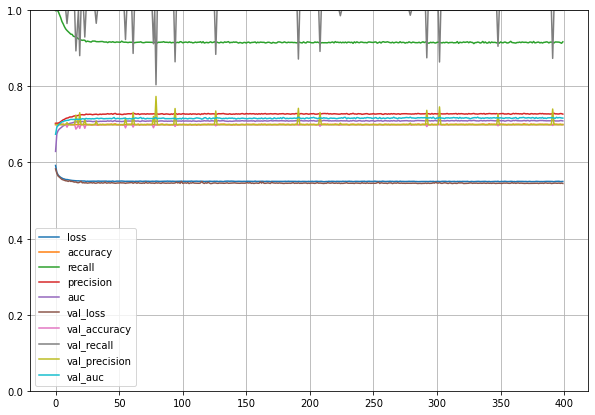

In [33]:
import matplotlib.pyplot as plt

pd.DataFrame(history_model.history).plot(figsize=(10, 7))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

85.79% (+/- 1.07%)
90.03% (+/- 0.77%)
89.18% (+/- 1.13%)
lr=0.001
epochs = 400
    model = Sequential()
    model.add(Conv1D(filters=128,kernel_size=3, strides=2, input_shape=X_train.shape[1:]))
    model.add(Activation('relu'))
    model.add(MaxPool1D(pool_size=2))
    model.add(Dropout(0.4))
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))